<a href="https://colab.research.google.com/github/MiguelWO/Ml_repo/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Analysis | Attrition Report

About Dataset

Predict attrition of your valuable employees.

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.


Education

1 'Below College'

2 'College'

3 'Bachelor'

4 'Master'

5 'Doctor'



EnvironmentSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'


JobInvolvement

1 'Low'

2 'Medium'

3 'High'

4 'Very High'


JobSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'


PerformanceRating

1 'Low'

2 'Good'

3 'Excellent'

4 'Outstanding'


RelationshipSatisfaction

1 'Low'

2 'Medium'

3 'High'

4 'Very High'



WorkLifeBalance

1 'Bad'

2 'Good'

3 'Better'

4 'Best'


## Cargar Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD


# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IA/HR Employee Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Analysis


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
print(data.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
numeric_columns = [column for column in data.columns if data[column].dtype == 'int64']
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


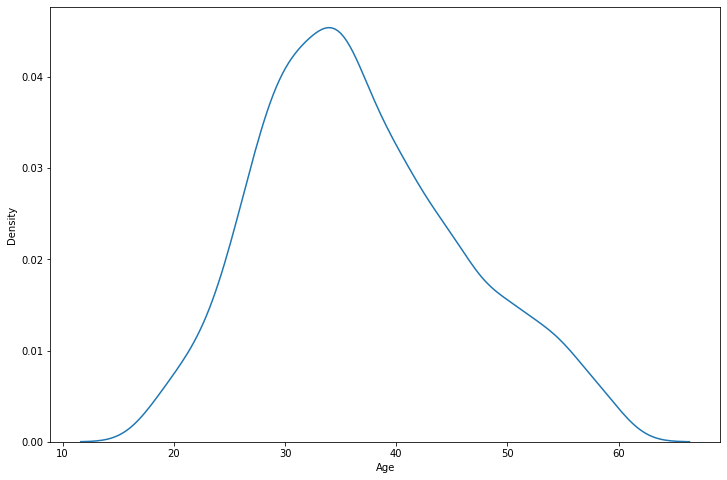

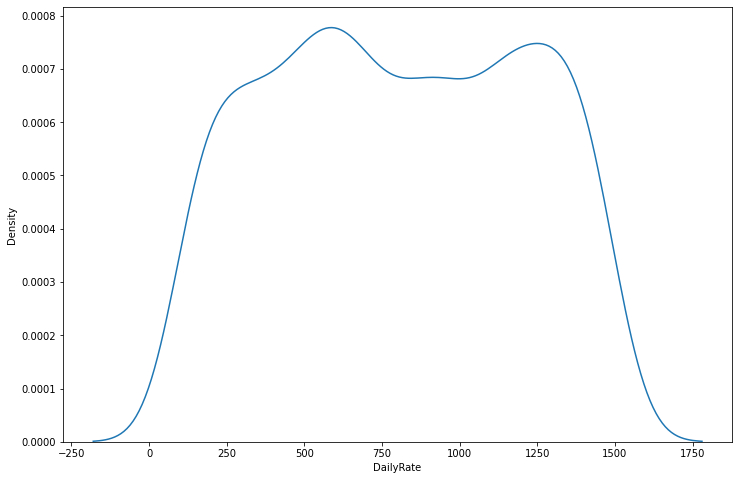

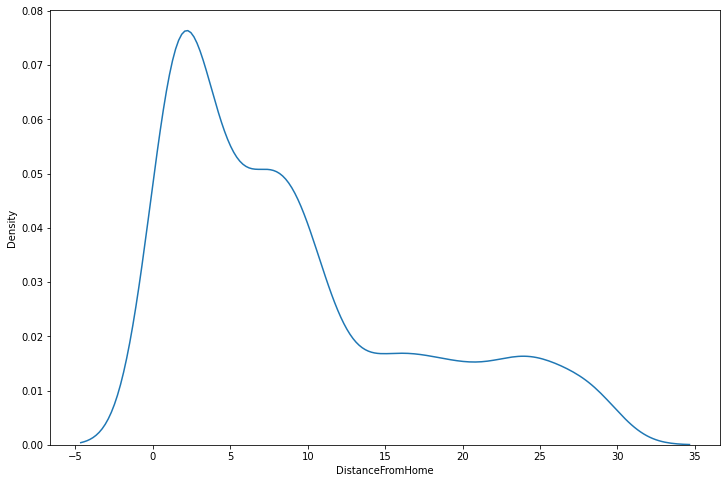

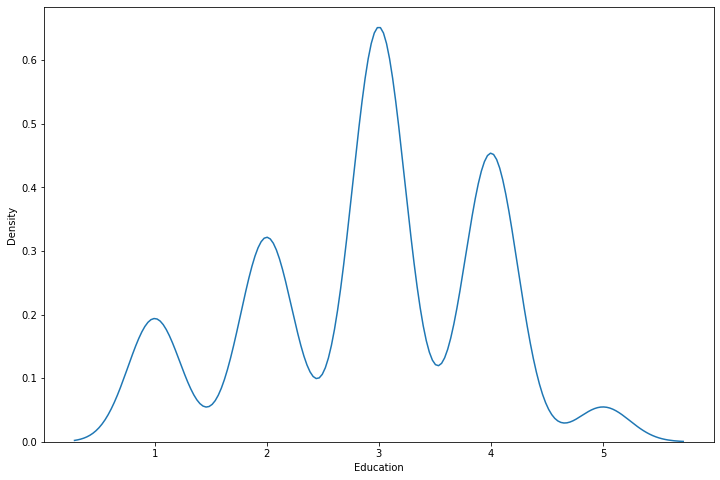

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


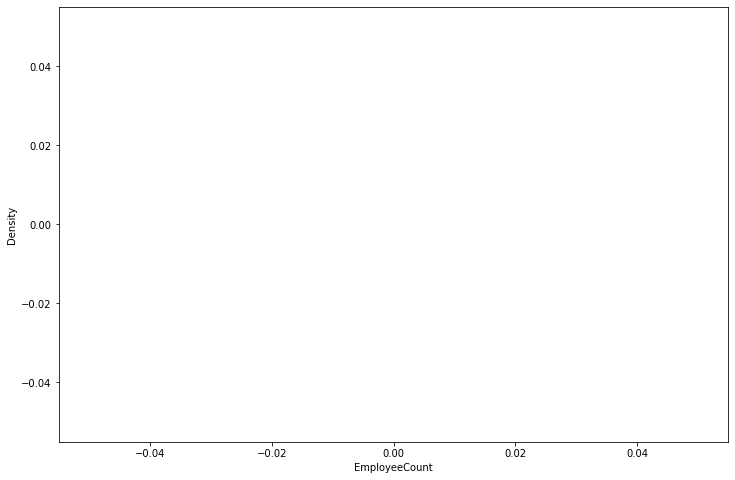

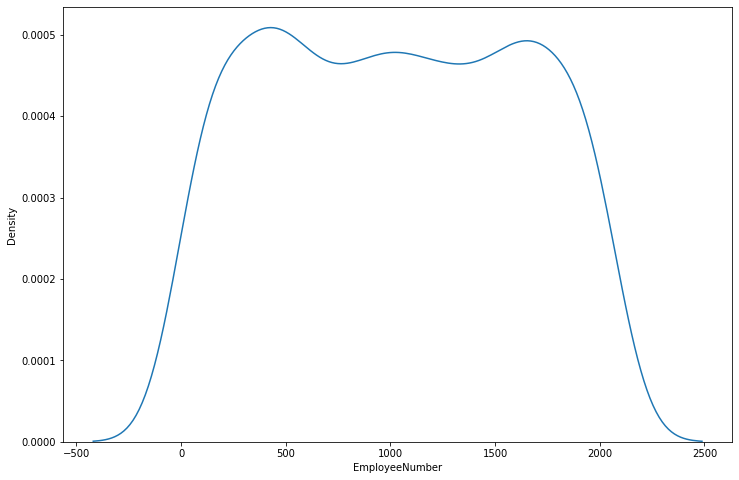

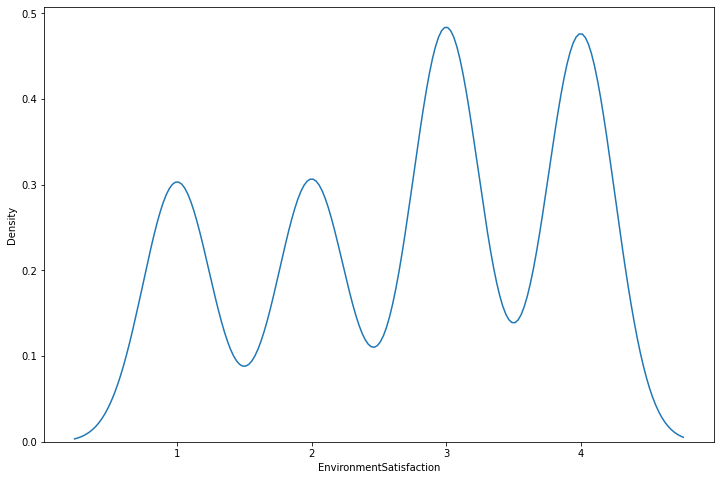

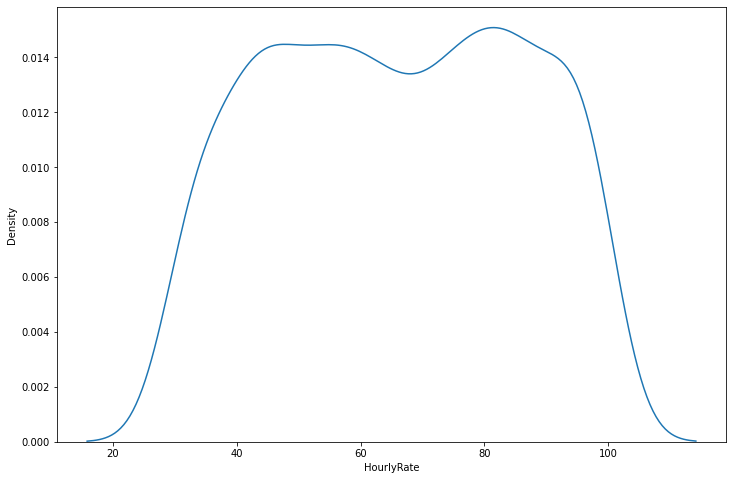

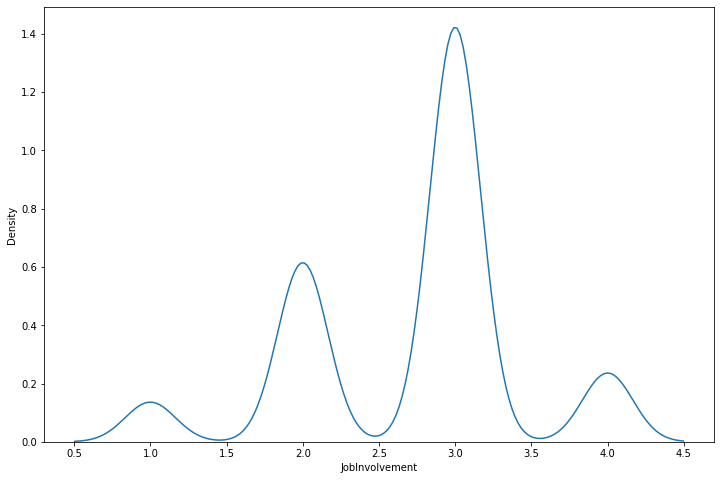

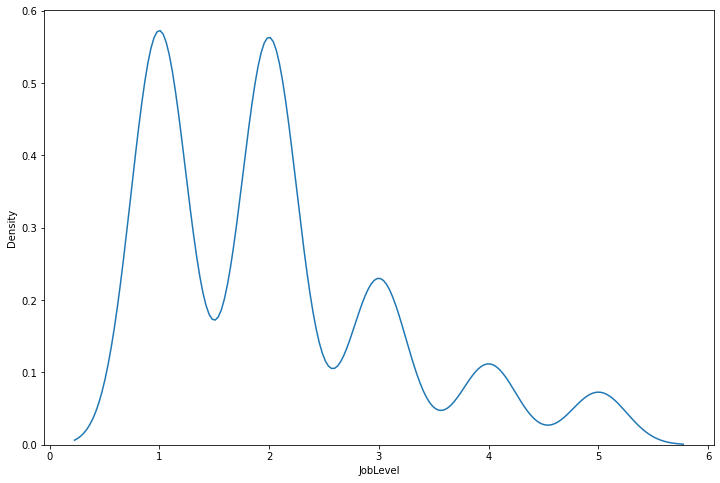

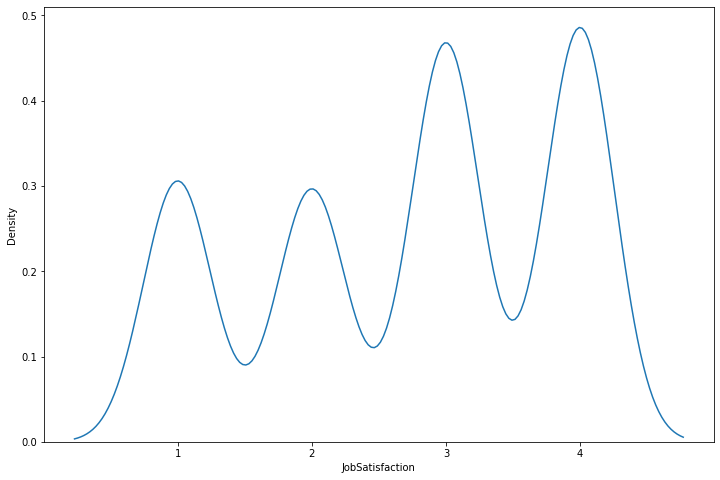

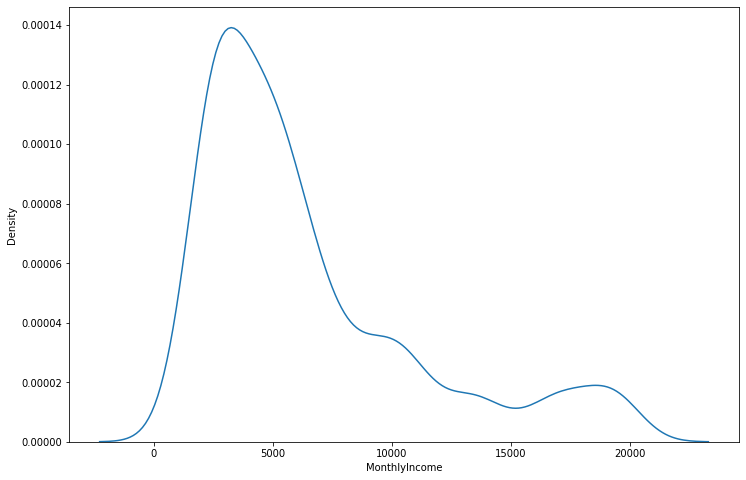

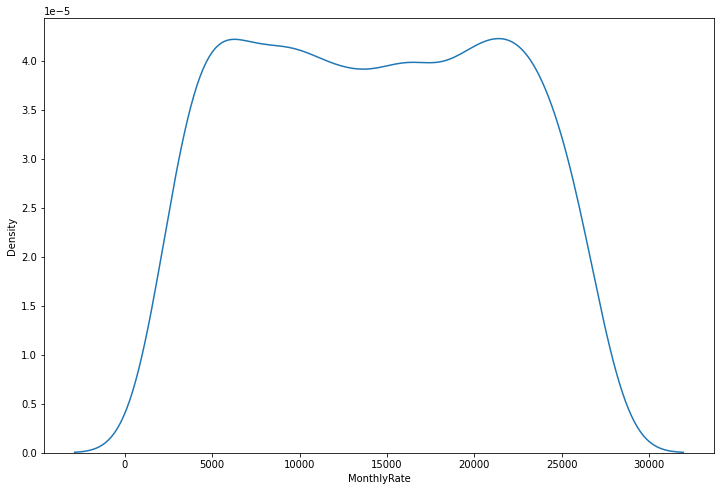

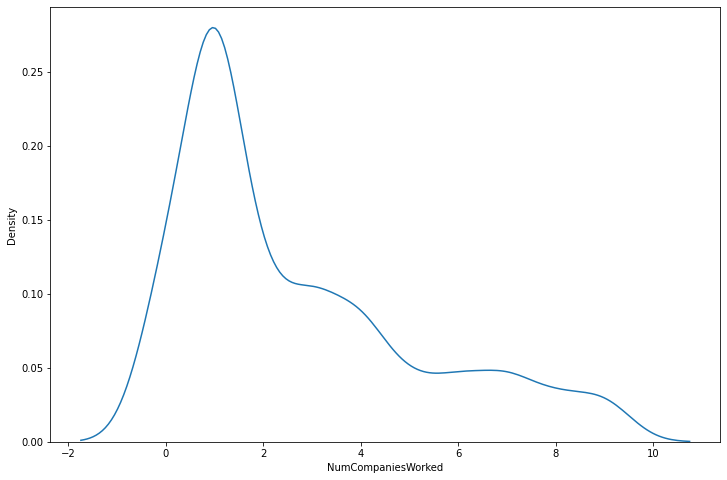

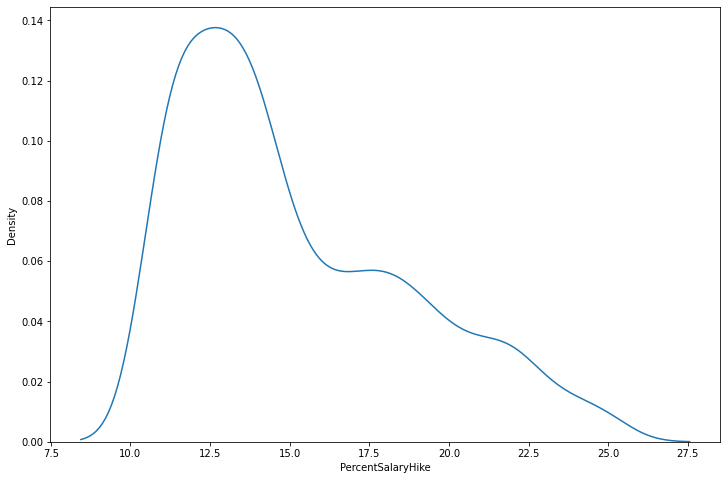

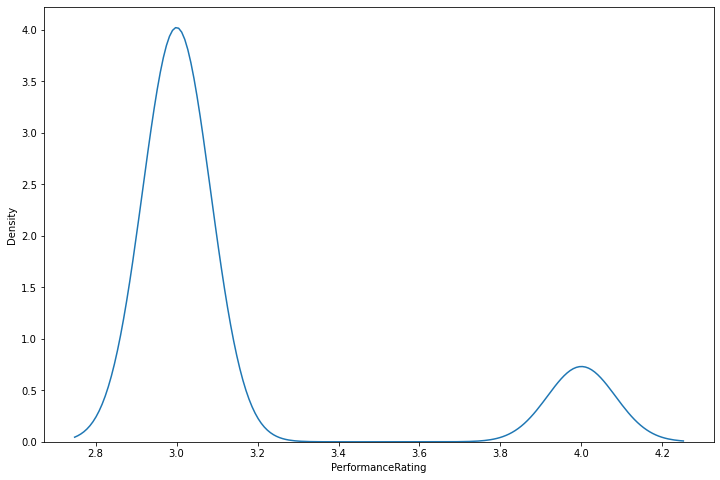

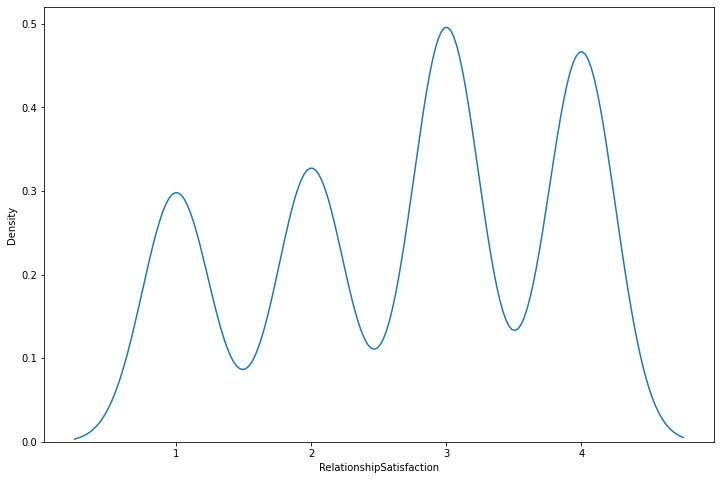

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


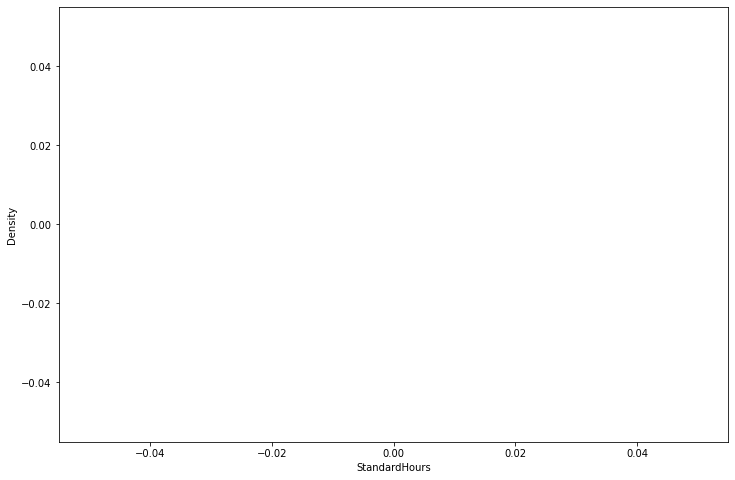

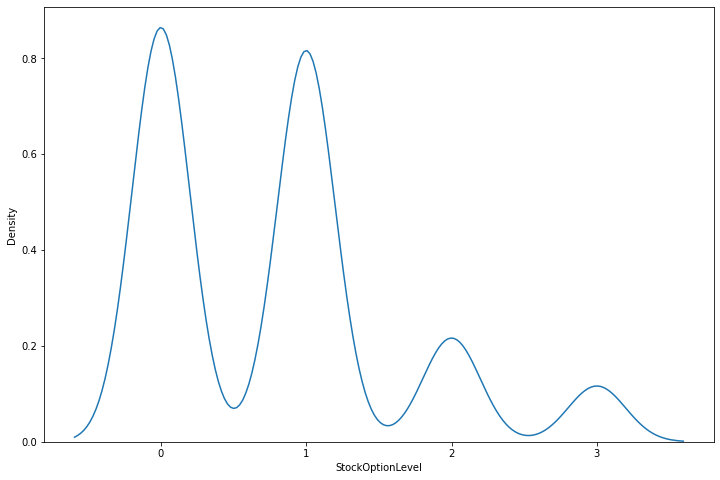

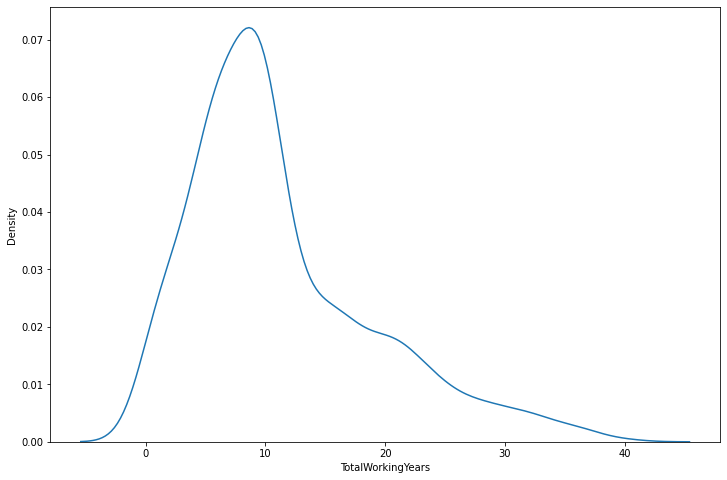

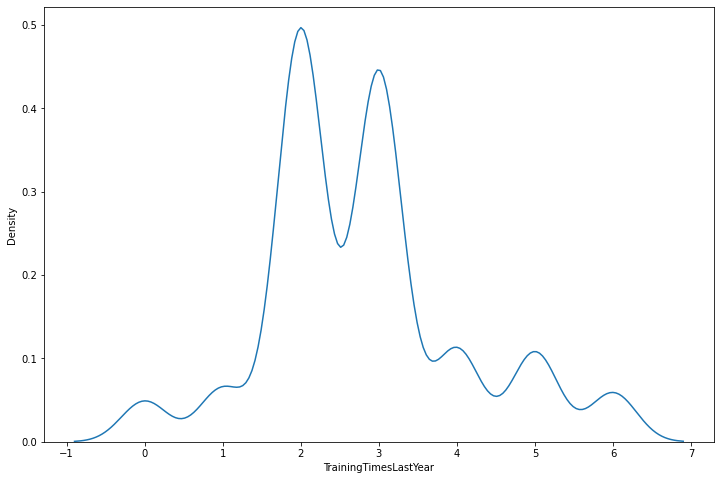

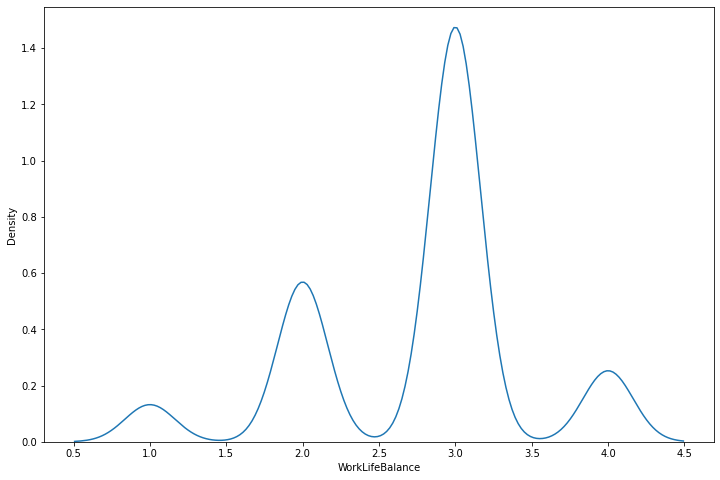

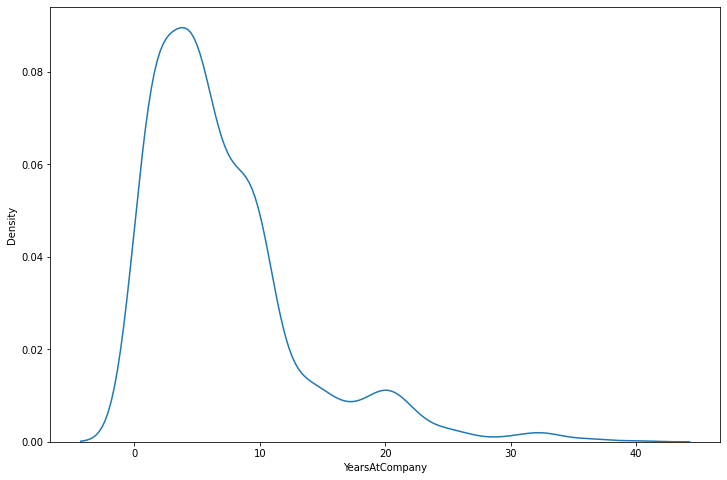

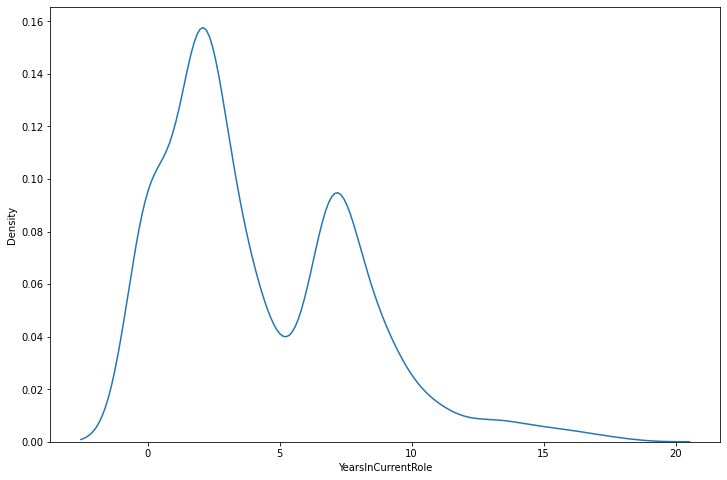

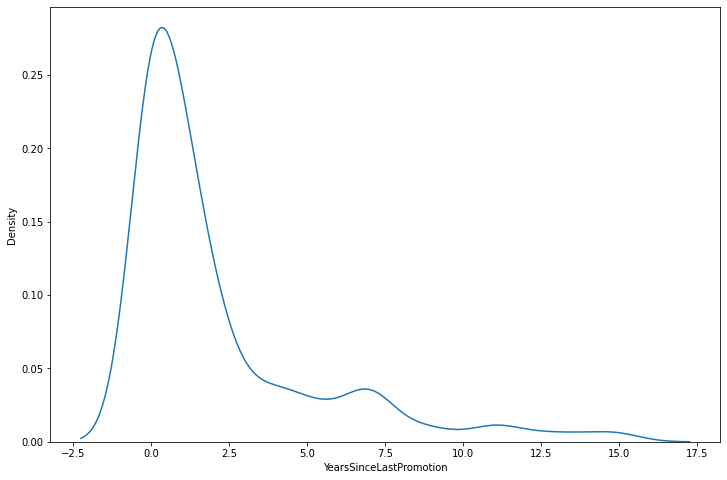

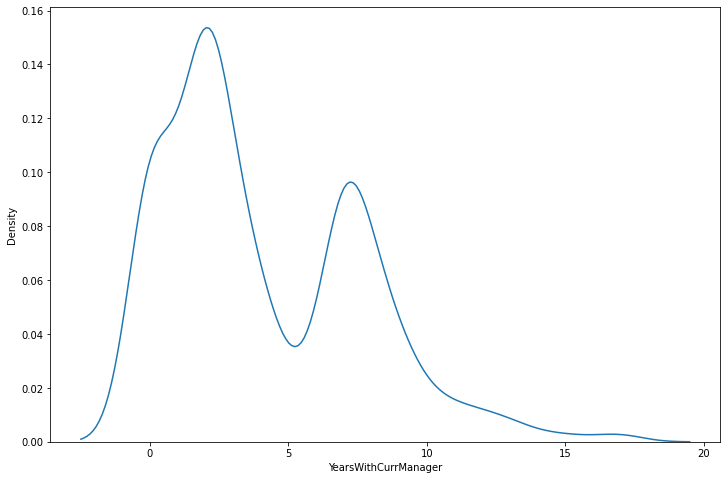

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=data, x=column, palette="crest")
    plt.show()

In [ ]:
categorical_columns = [column for column in data.columns if data[column].dtype != 'int64']
print(categorical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


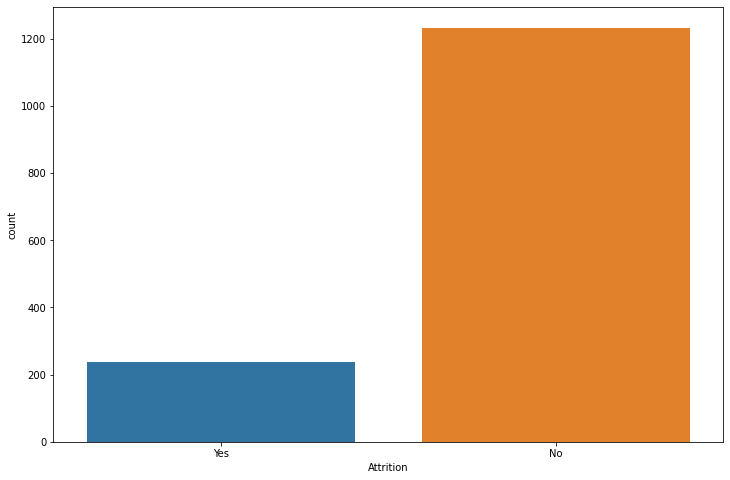

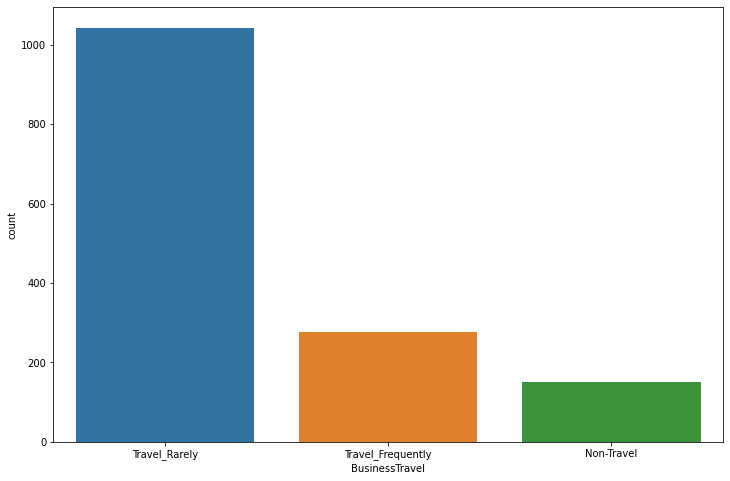

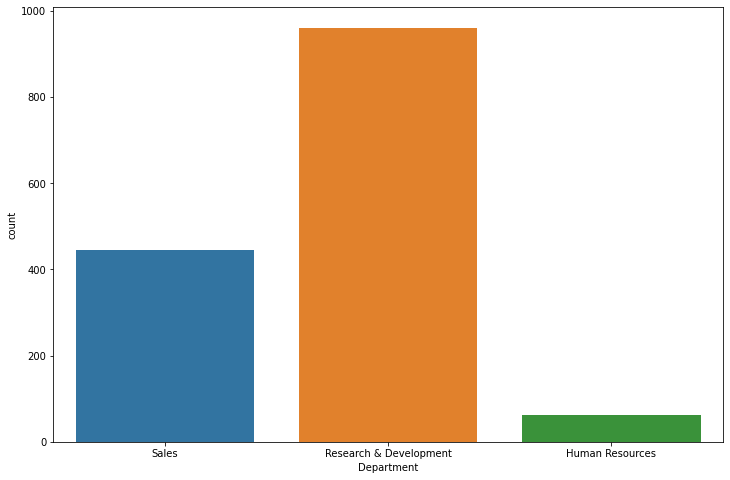

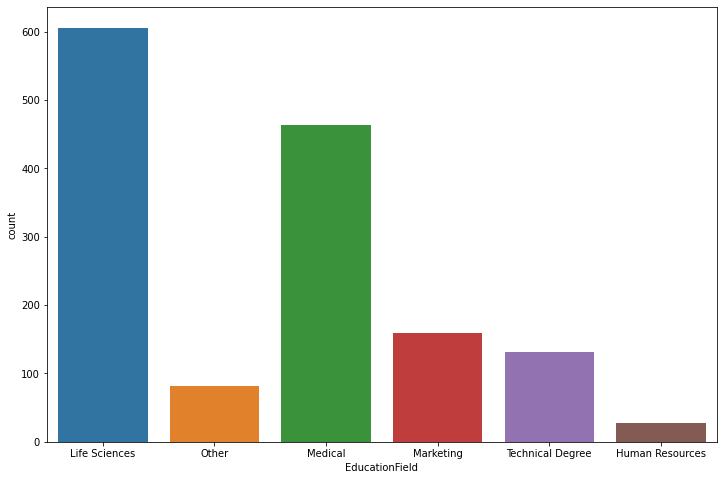

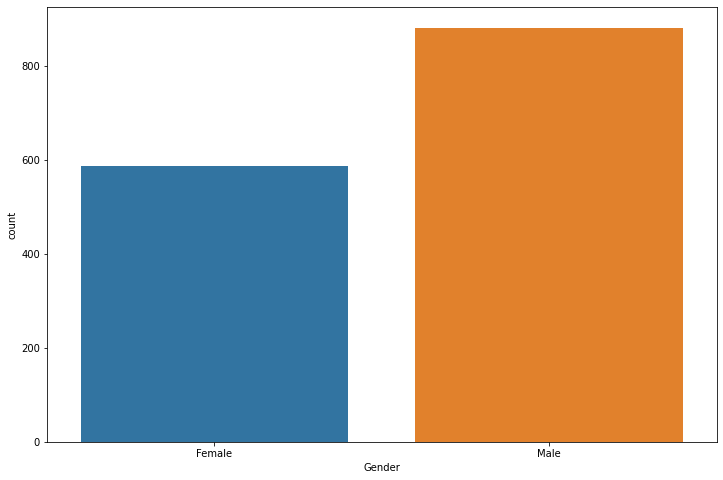

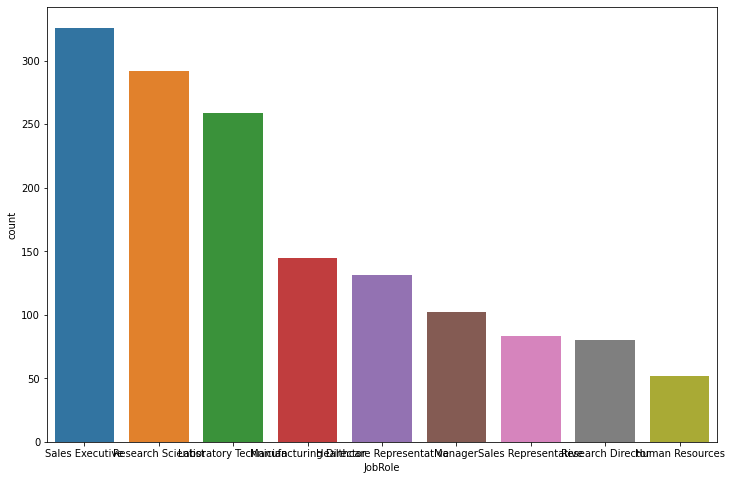

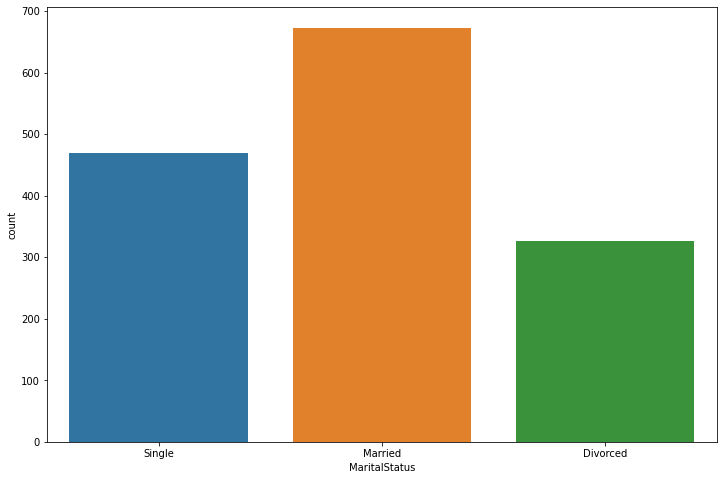

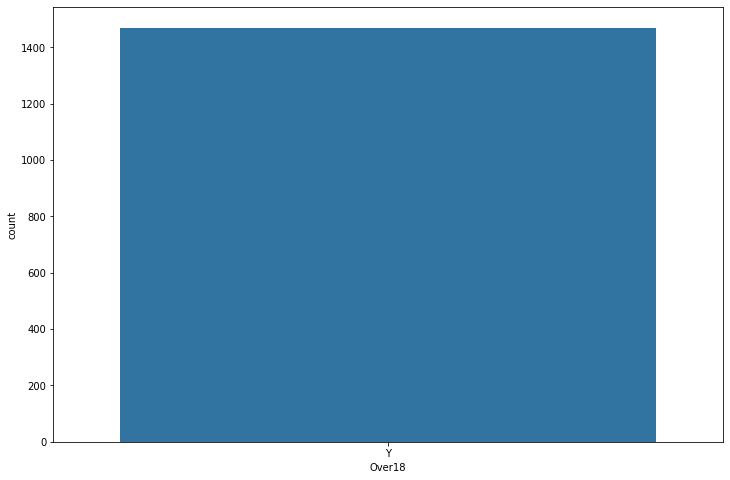

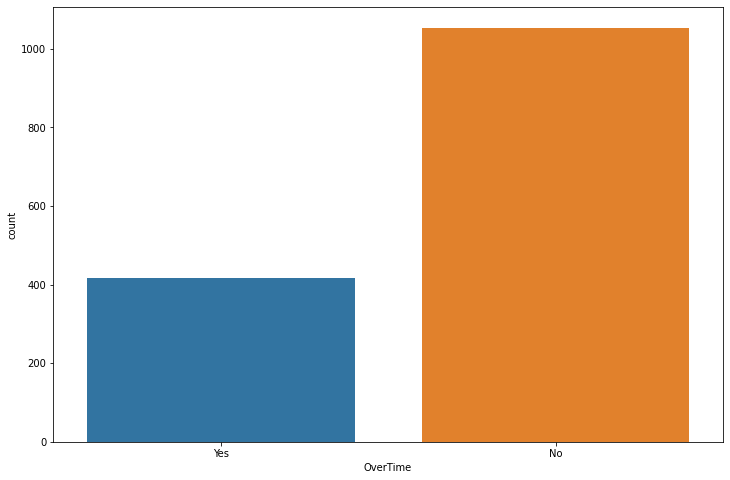

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=data[column])
    plt.show()



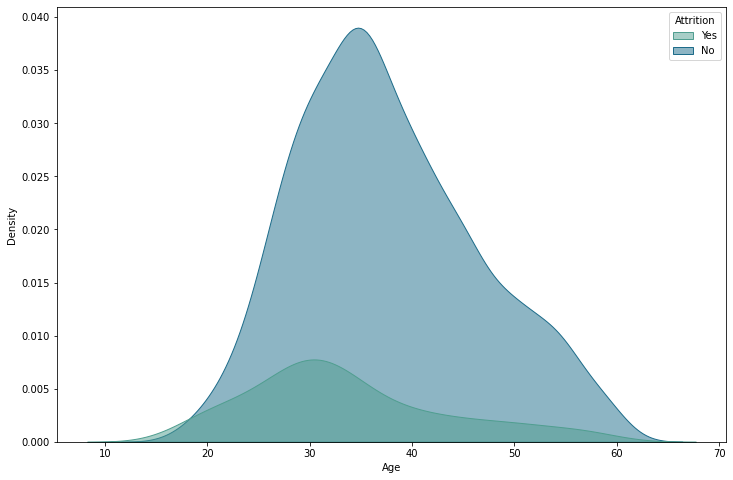

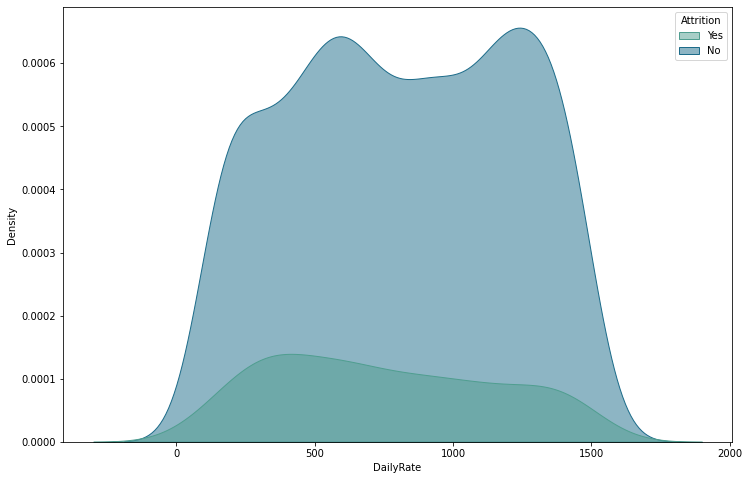

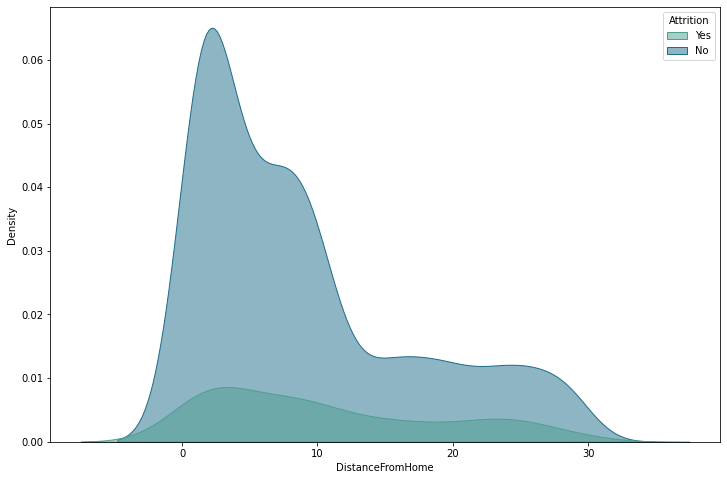

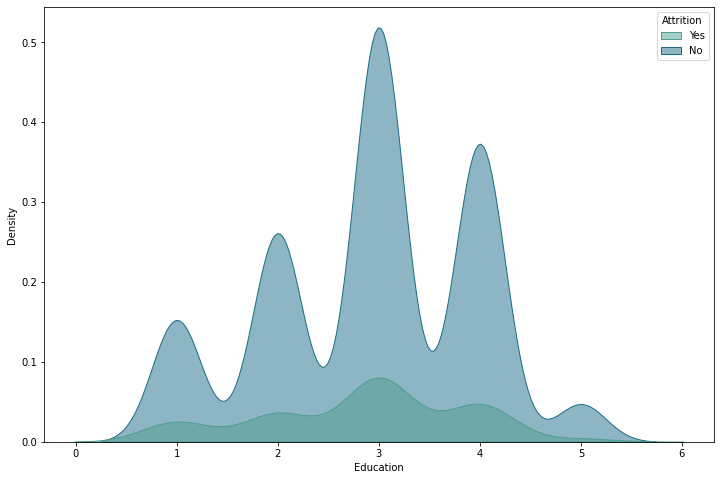

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


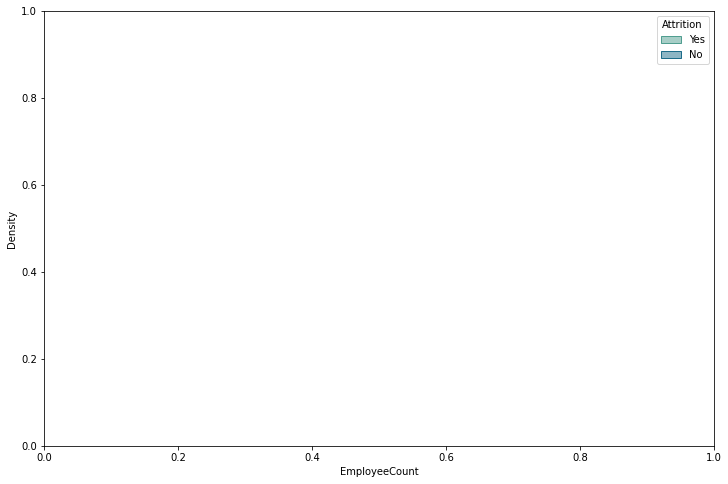

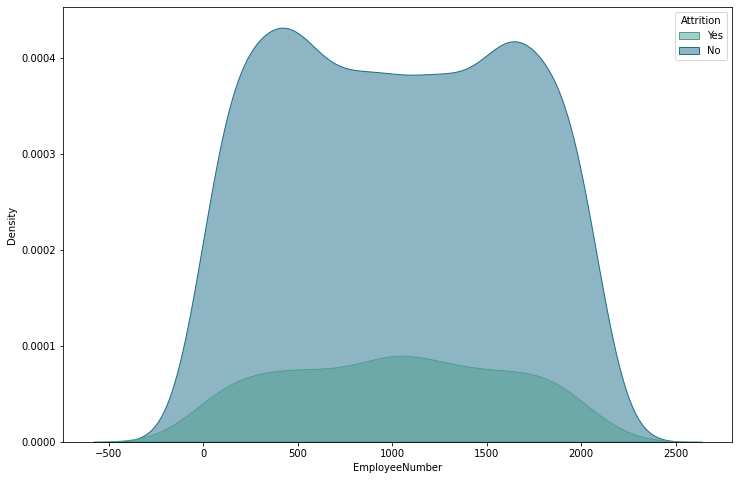

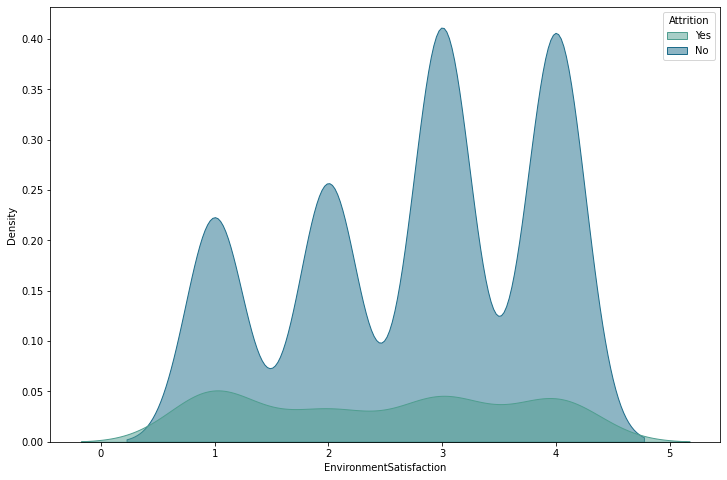

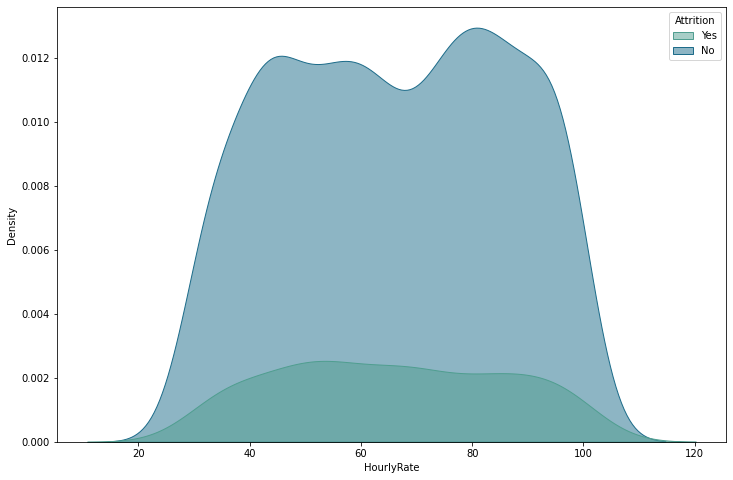

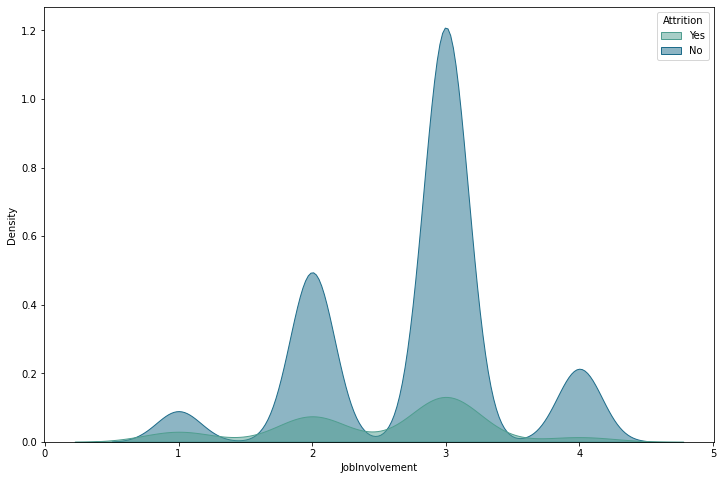

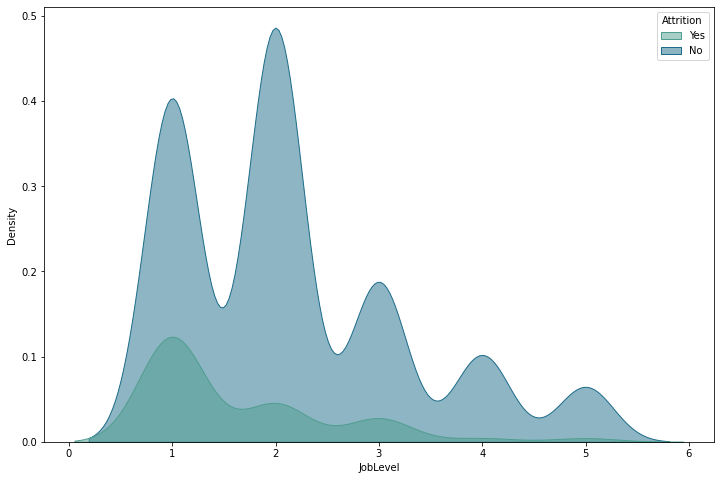

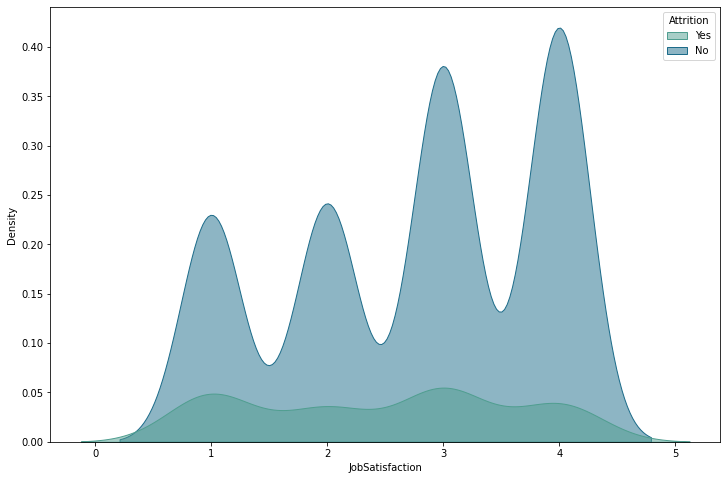

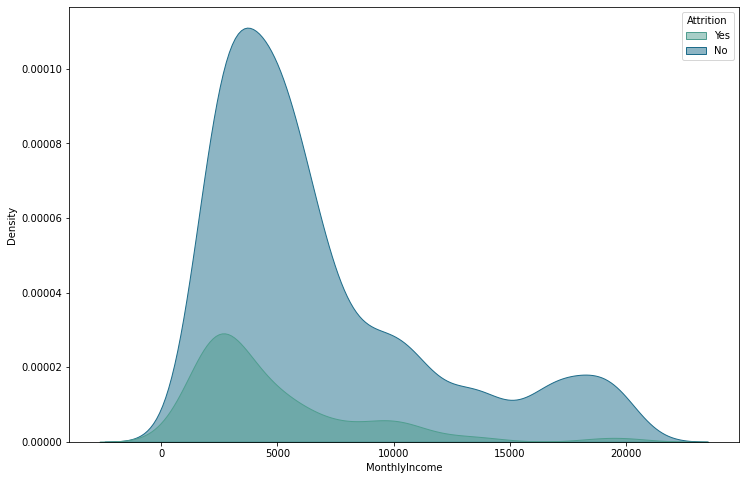

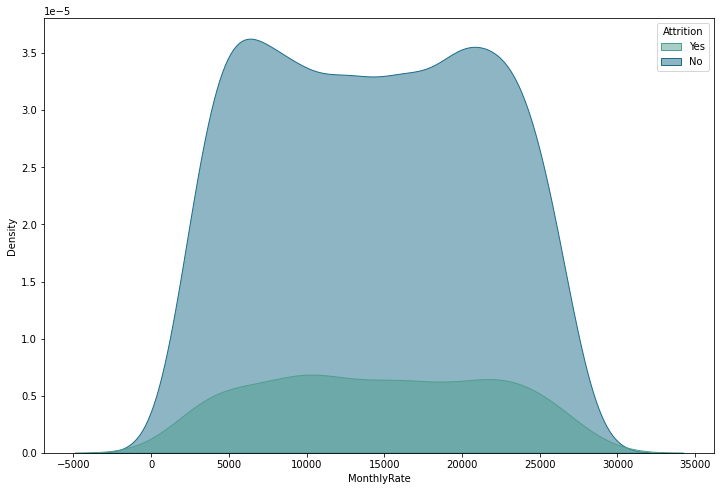

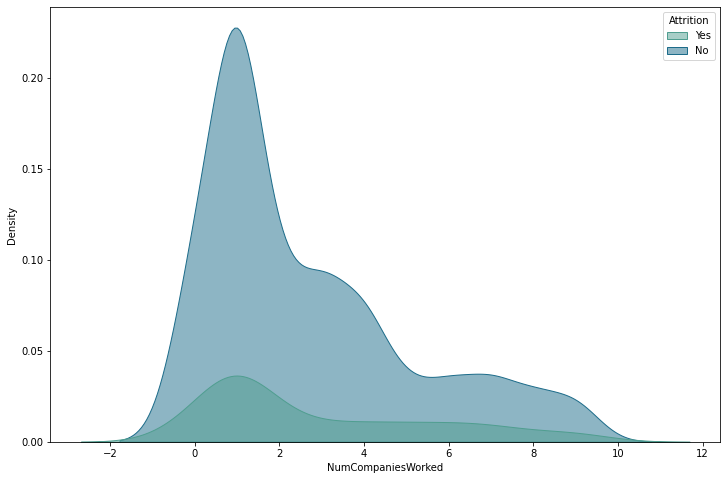

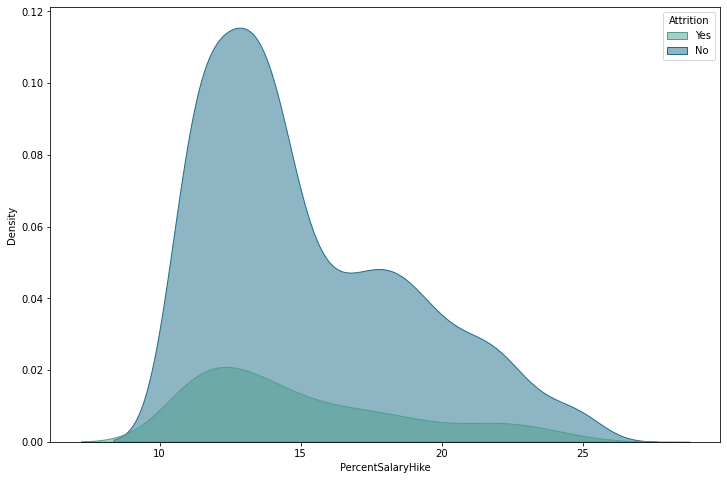

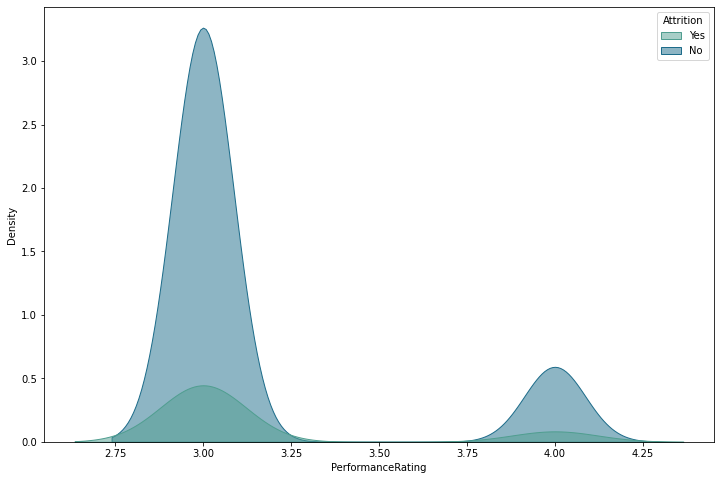

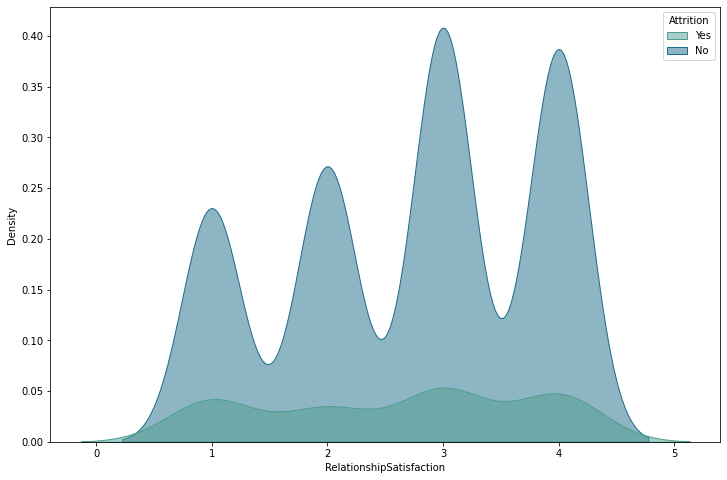

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


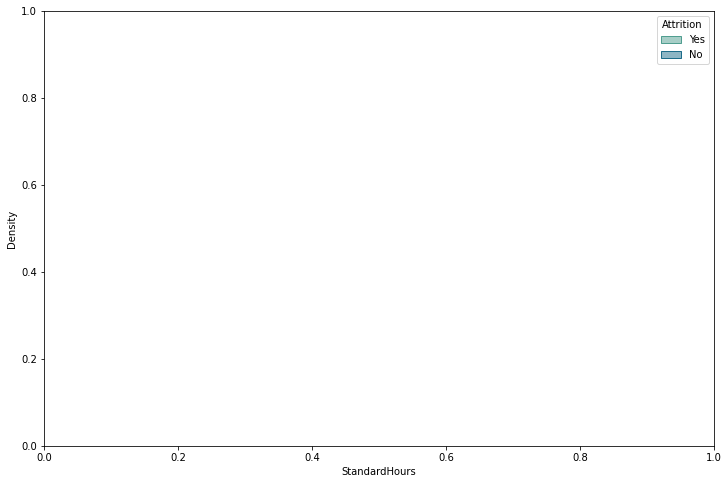

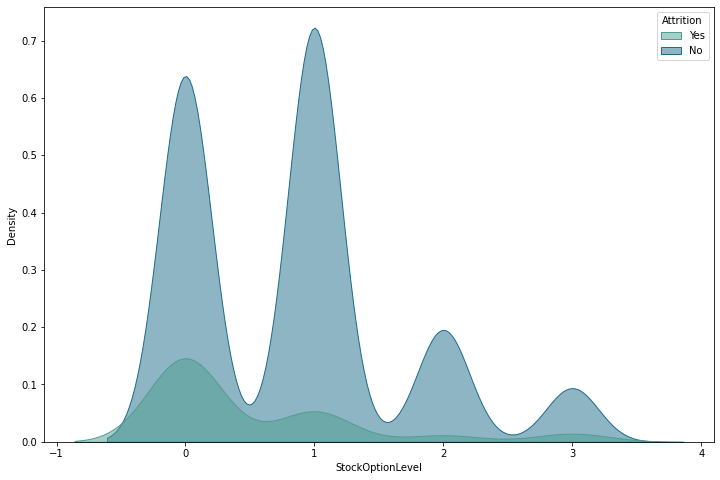

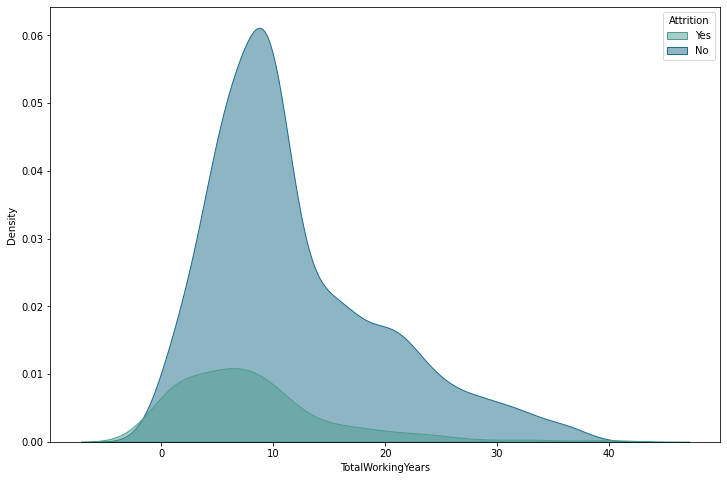

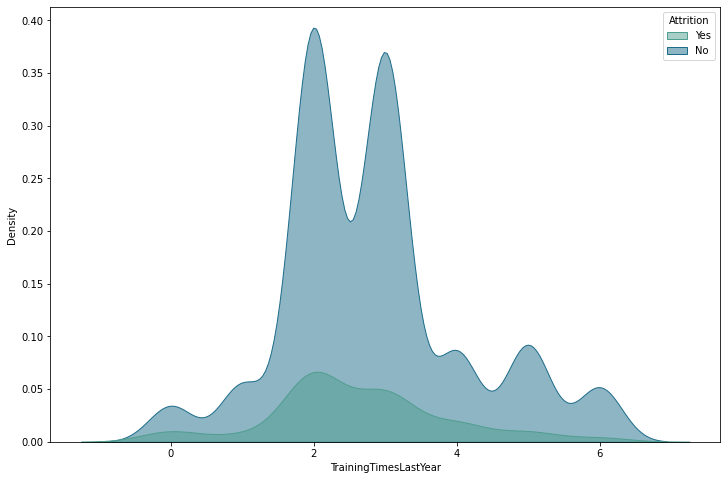

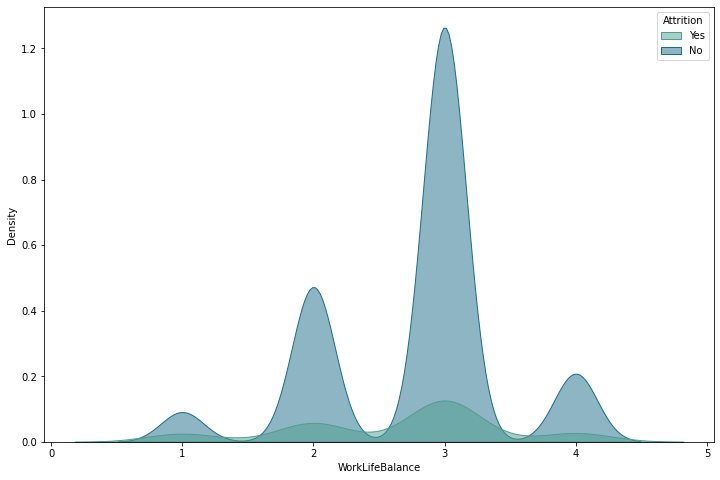

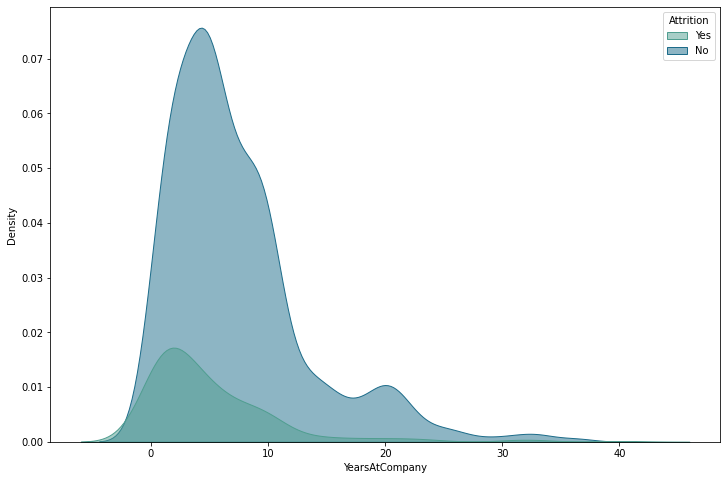

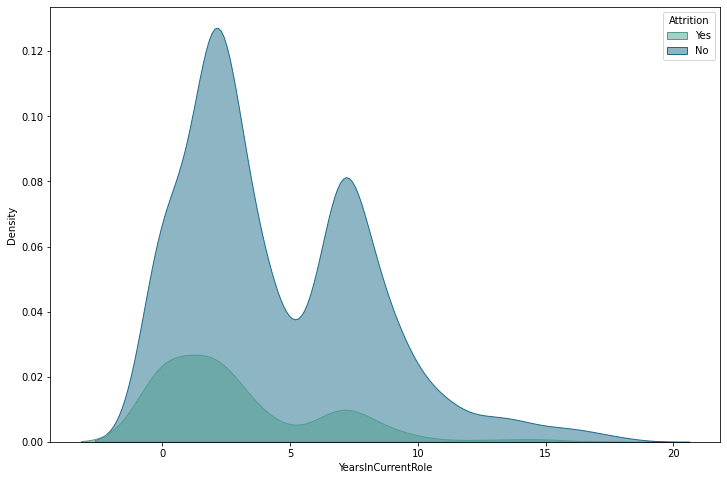

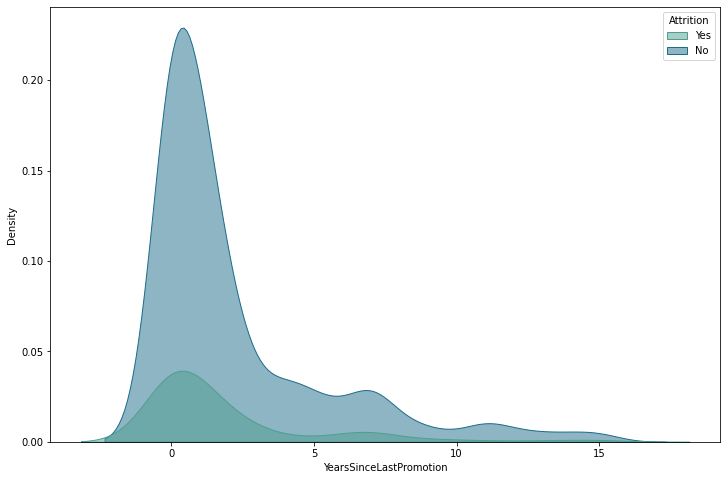

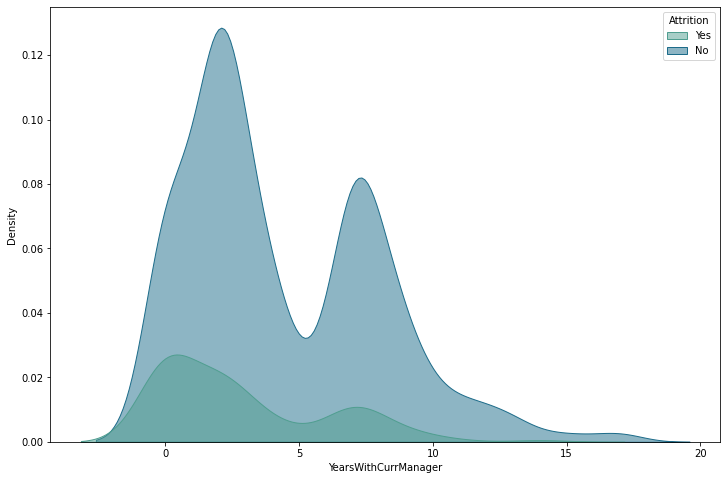

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=data, x=column, hue="Attrition", fill=True, alpha=.5, palette="crest")
    plt.show()





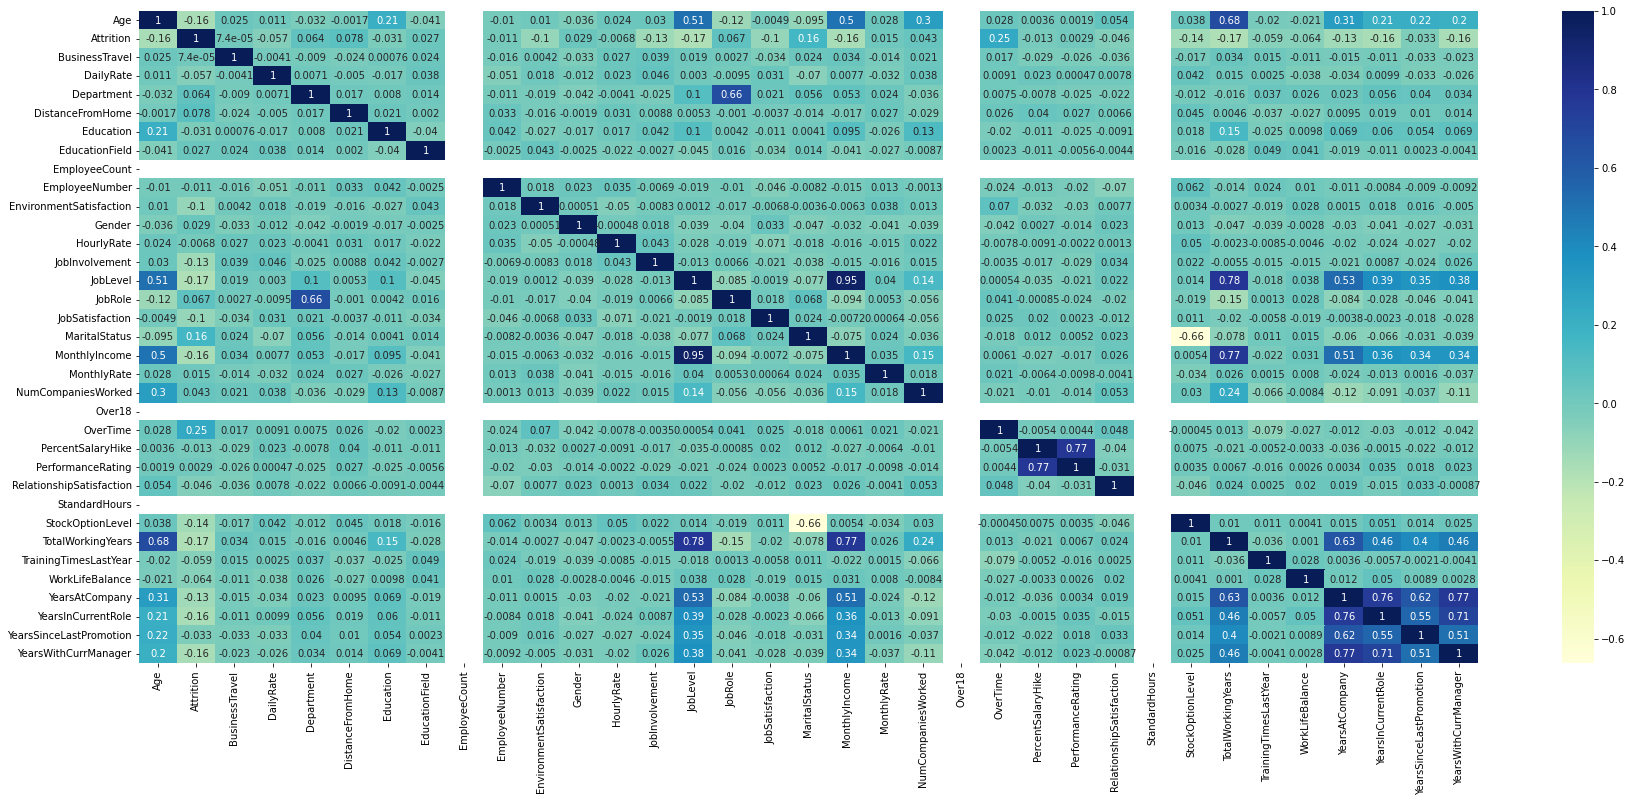

In [ ]:
df1 = data.copy()

encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = encoder.fit_transform(df1[column])

plt.figure(figsize=(30,12))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")


## Data Preprocessing and Pipelining


In [ ]:
X_train=data.drop(columns=["Attrition"])
y_train=data["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (1029, 34)
Test dataset shape (1029,)


In [ ]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)



Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
****************************************************************************************************
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [ ]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRat...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
               

## Generic Methods for Model Preparation & Metric Evaliation¶

In [ ]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [ ]:


def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 



In [ ]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [ ]:


def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    #print(y_test)
    #print(y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()



## Model Preparation

In [ ]:
algorithms = [('bagging classifier', BaggingClassifier()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

## Model Evaluation

In [ ]:
print(model_and_score)



{'bagging classifier': '97.27891156462584%', 'KNN classifier': '86.0058309037901%', 'Random Forest calssifier': '100.0%', 'Adaboost classifier': '85.71428571428571%', 'Gradientboot classifier': '90.96209912536443%', 'MLP': '84.35374149659864%'}


bagging classifier


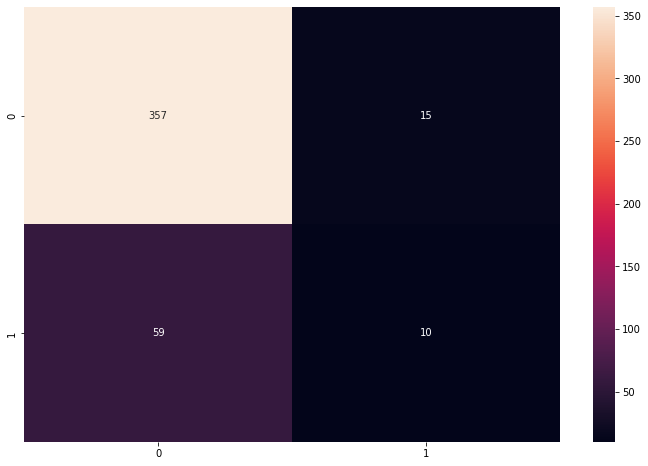

KNN classifier


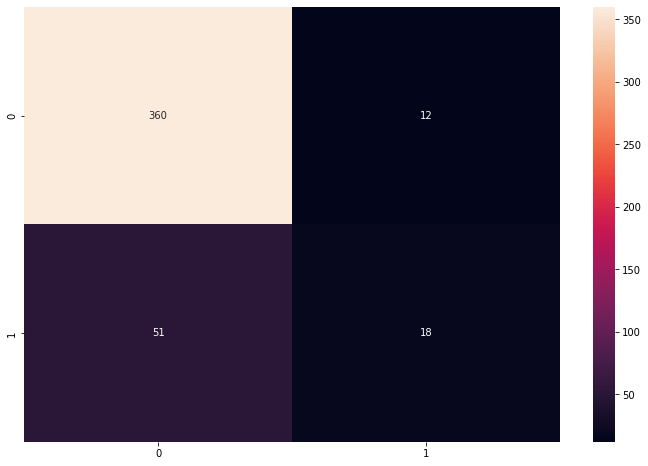

Random Forest calssifier


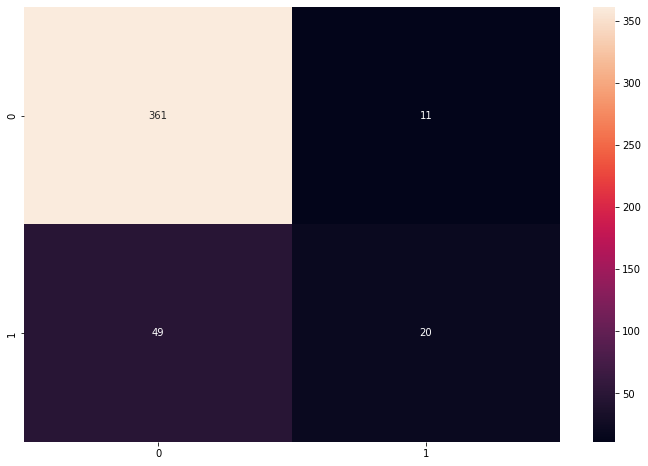

Adaboost classifier


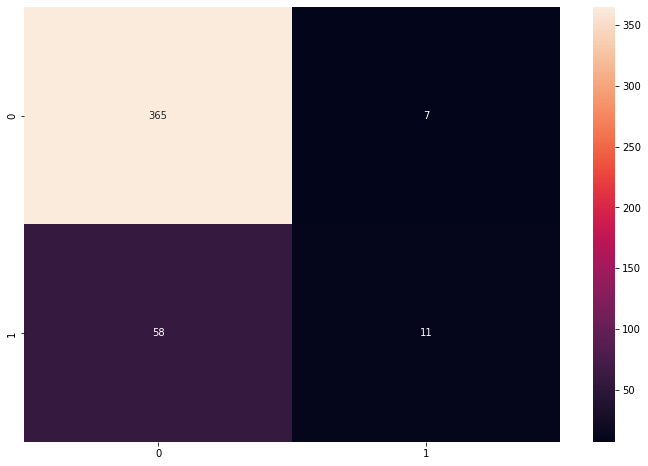

Gradientboot classifier


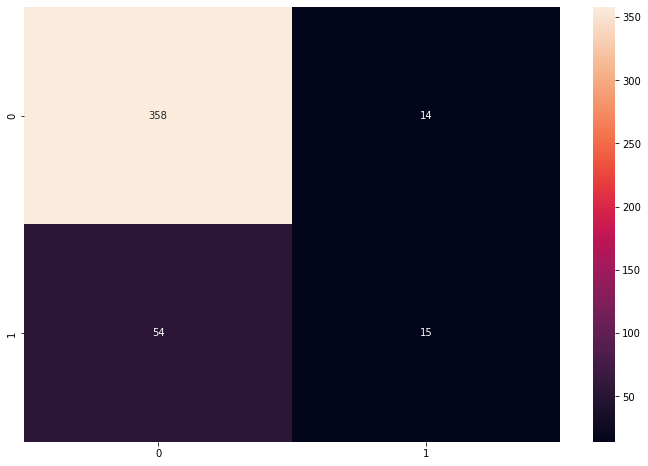

MLP


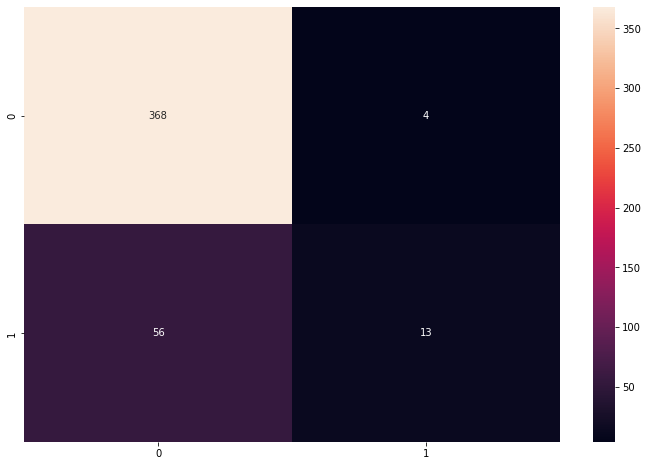

In [ ]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [ ]:

for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")



bagging classifier Report :
              precision    recall  f1-score   support

          No       0.86      0.96      0.91       372
         Yes       0.40      0.14      0.21        69

    accuracy                           0.83       441
   macro avg       0.63      0.55      0.56       441
weighted avg       0.79      0.83      0.80       441



KNN classifier Report :
              precision    recall  f1-score   support

          No       0.88      0.97      0.92       372
         Yes       0.60      0.26      0.36        69

    accuracy                           0.86       441
   macro avg       0.74      0.61      0.64       441
weighted avg       0.83      0.86      0.83       441



Random Forest calssifier Report :
              precision    recall  f1-score   support

          No       0.88      0.97      0.92       372
         Yes       0.65      0.29      0.40        69

    accuracy                           0.86       441
   macro avg       0.76      0.63     

bagging classifier


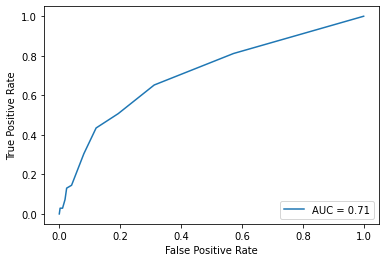

KNN classifier


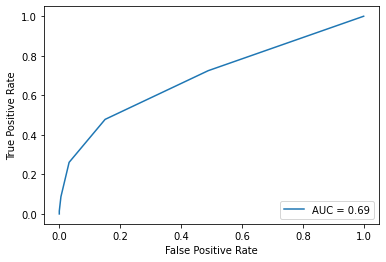

Random Forest calssifier


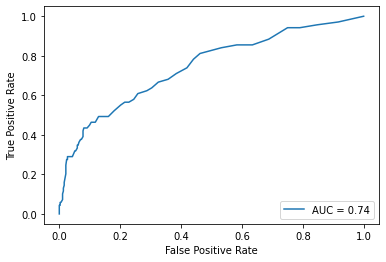

Adaboost classifier


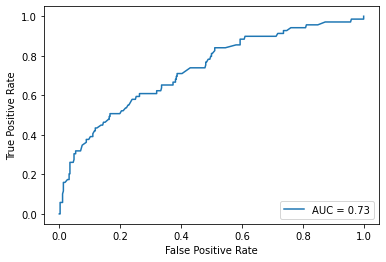

Gradientboot classifier


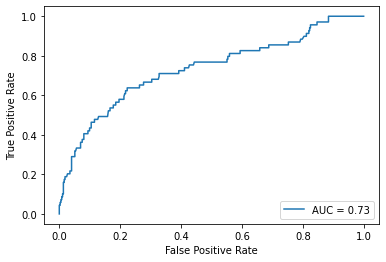

MLP


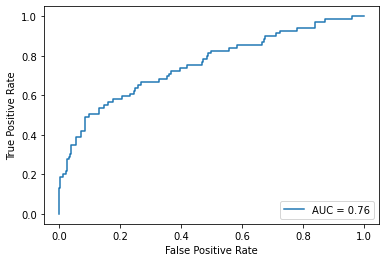

In [ ]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])